### Método Newton - Levenberg Marquard

Insalar las librerias para realizar calculos simbólicos.

In [1]:
!pip install sympy

In [238]:
import numpy as np
import numpy.linalg as npl
from sympy import symbols, diff, pi, cos, exp, sqrt, Abs
import matplotlib.pyplot as plt

## Función de Ackley

### 2 dimensiones

In [405]:
x1, x2= symbols('x1 x2') #variables simbolicas
x = np.array([[-0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 100 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
error = 10**-60 #Error minimo, criterio de parada

a = 20
b = 0.2
c = 2*pi
d=2

f=-a*exp(-b*sqrt(1/d*(x1**2+x2**2)))-exp(1/d*(cos(c*x1)+cos(c*x2)))+a+exp(1)#función objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx1dx2=diff(df_dx1,x2)
x_temp = [(x1,x[0,0]),(x2,x[0,1])]
grad = np.array([df_dx1.subs(x_temp).evalf(),df_dx2.subs(x_temp).evalf()])#Vector gradiente
H = np.array([[d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf()],[d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
ide = np.identity(d) #matriz de identidad
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    x_temp = [(x1,x[i,0]),(x2,x[i,1])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),df_dx2.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([[d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf()],[d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf()]])#Hessiano
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 101
final Z value: 0.0349736563155063
last x values: [-0.00791087437099679 0.00791087437099679]


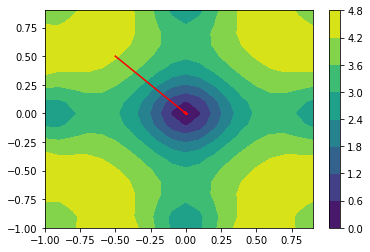

In [402]:
vals = np.arange(-1,1,0.1)
z_c = np.ones(len(vals)**2).reshape(len(vals),len(vals))
for i in range(0,len(vals)):
    for j in range(0,len(vals)):
        x_test = [(x1,vals[i]),(x2,vals[j])]
        z_c[i,j] = float(f.subs(x_test).evalf())
plt.contourf(vals,vals,z_c)
plt.plot(x[:,0],x[:,1],c='red')
plt.colorbar();

### 5 Dimensiones

In [403]:
x1, x2, x3, x4, x5= symbols('x1 x2 x3 x4 x5') #variables simbolicas
x = np.array([[-0.5,0.5,0.5,0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 100 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
ide = np.identity(d) #matriz de identidad
error = 10**-60 #Error minimo, criterio de parada

a = 20
b = 0.2
c = 2*pi
d = 5

f=-a*exp(-b*sqrt(1/d*(x1**2+x2**2+x3**2+x4**3+x5**2)))-exp(1/d*(cos(c*x1)+cos(c*x2)+cos(c*x3)+cos(c*x4)+cos(c*x5)))+a+exp(1)#función objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
df_dx3=diff(f,x3)
df_dx4=diff(f,x4)
df_dx5=diff(f,x5)

d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx32=diff(df_dx3,x3)
d2f_dx42=diff(df_dx4,x4)
d2f_dx52=diff(df_dx5,x5)

d2f_dx1dx2=diff(df_dx1,x2)
d2f_dx1dx3=diff(df_dx1,x3)
d2f_dx1dx4=diff(df_dx1,x4)
d2f_dx1dx5=diff(df_dx1,x5)
d2f_dx2dx3=diff(df_dx2,x3)
d2f_dx2dx4=diff(df_dx2,x4)
d2f_dx2dx5=diff(df_dx2,x5)
d2f_dx3dx4=diff(df_dx3,x4)
d2f_dx3dx5=diff(df_dx3,x5)
d2f_dx4dx5=diff(df_dx4,x5)

x_temp = [(x1,x[0,0]),
          (x2,x[0,1]),
          (x3,x[0,2]),
          (x4,x[0,3]),
          (x5,x[0,4])]
grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf()])#Vector gradiente
H = np.array([
    [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf()],
    [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf()],
    [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf()],
    [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf()],
    [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    x_temp = [(x1,x[i,0]),
              (x2,x[i,1]),
              (x3,x[i,2]),
              (x4,x[i,3]),
              (x5,x[i,4])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([
        [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf()],
        [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf()],
        [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf()],
        [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf()],
        [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf()]])#Hessiano
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 101
final Z value: 0.0151586750491971
last x values: [0.00404241467517202 -0.00404241467517206 -0.00404241467517194
 -7.34771631268092e-8 -0.00404241467517196]


### 10 Dimensiones

In [420]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10= symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10') #variables simbolicas
x = np.array([[-0.5,0.5,0.5,0.5,0.5,-0.5,0.5,0.5,0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 1000 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
ide = np.identity(d) #matriz de identidad
error = 10**-60 #Error minimo, criterio de parada

a = 20
b = 0.2
c = 2*pi
d = 10

f=-a*exp(-b*sqrt(1/d*(x1**2+x2**2+x3**2+x4**3+x5**2+x6**2+x7**2+x8**2+x9**3+x10**2)))-exp(1/d*(cos(c*x1)+cos(c*x2)+cos(c*x3)+cos(c*x4)+cos(c*x5)+cos(c*x6)+cos(c*x7)+cos(c*x8)+cos(c*x9)+cos(c*x10)))+a+exp(1)#función objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
df_dx3=diff(f,x3)
df_dx4=diff(f,x4)
df_dx5=diff(f,x5)
df_dx6=diff(f,x6)
df_dx7=diff(f,x7)
df_dx8=diff(f,x8)
df_dx9=diff(f,x9)
df_dx10=diff(f,x10)

d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx32=diff(df_dx3,x3)
d2f_dx42=diff(df_dx4,x4)
d2f_dx52=diff(df_dx5,x5)
d2f_dx62=diff(df_dx6,x6)
d2f_dx72=diff(df_dx7,x7)
d2f_dx82=diff(df_dx8,x8)
d2f_dx92=diff(df_dx9,x9)
d2f_dx102=diff(df_dx10,x10)

d2f_dx1dx2=diff(df_dx1,x2)
d2f_dx1dx3=diff(df_dx1,x3)
d2f_dx1dx4=diff(df_dx1,x4)
d2f_dx1dx5=diff(df_dx1,x5)
d2f_dx1dx6=diff(df_dx1,x6)
d2f_dx1dx7=diff(df_dx1,x7)
d2f_dx1dx8=diff(df_dx1,x8)
d2f_dx1dx9=diff(df_dx1,x9)
d2f_dx1dx10=diff(df_dx1,x10)
d2f_dx2dx3=diff(df_dx2,x3)
d2f_dx2dx4=diff(df_dx2,x4)
d2f_dx2dx5=diff(df_dx2,x5)
d2f_dx2dx6=diff(df_dx2,x6)
d2f_dx2dx7=diff(df_dx2,x7)
d2f_dx2dx8=diff(df_dx2,x8)
d2f_dx2dx9=diff(df_dx2,x9)
d2f_dx2dx10=diff(df_dx2,x10)
d2f_dx3dx4=diff(df_dx3,x4)
d2f_dx3dx5=diff(df_dx3,x5)
d2f_dx3dx6=diff(df_dx3,x6)
d2f_dx3dx7=diff(df_dx3,x7)
d2f_dx3dx8=diff(df_dx3,x8)
d2f_dx3dx9=diff(df_dx3,x9)
d2f_dx3dx10=diff(df_dx3,x10)
d2f_dx4dx5=diff(df_dx4,x5)
d2f_dx4dx6=diff(df_dx4,x6)
d2f_dx4dx7=diff(df_dx4,x7)
d2f_dx4dx8=diff(df_dx4,x8)
d2f_dx4dx9=diff(df_dx4,x9)
d2f_dx4dx10=diff(df_dx4,x10)
d2f_dx5dx6=diff(df_dx5,x6)
d2f_dx5dx7=diff(df_dx5,x7)
d2f_dx5dx8=diff(df_dx5,x8)
d2f_dx5dx9=diff(df_dx5,x9)
d2f_dx5dx10=diff(df_dx5,x10)
d2f_dx6dx7=diff(df_dx6,x7)
d2f_dx6dx8=diff(df_dx6,x8)
d2f_dx6dx9=diff(df_dx6,x9)
d2f_dx6dx10=diff(df_dx6,x10)
d2f_dx7dx8=diff(df_dx7,x8)
d2f_dx7dx9=diff(df_dx7,x9)
d2f_dx7dx10=diff(df_dx7,x10)
d2f_dx8dx9=diff(df_dx8,x9)
d2f_dx8dx10=diff(df_dx8,x10)
d2f_dx9dx10=diff(df_dx9,x10)

x_temp = [(x1,x[0,0]),
          (x2,x[0,1]),
          (x3,x[0,2]),
          (x4,x[0,3]),
          (x5,x[0,4]),
          (x6,x[0,5]),
          (x7,x[0,6]),
          (x8,x[0,7]),
          (x9,x[0,8]),
          (x10,x[0,9])]
grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf(),
                 df_dx6.subs(x_temp).evalf(),
                 df_dx7.subs(x_temp).evalf(),
                 df_dx8.subs(x_temp).evalf(),
                 df_dx9.subs(x_temp).evalf(),
                 df_dx10.subs(x_temp).evalf()])#Vector gradiente
H = np.array([
    [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf(),
    d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx1dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),
    d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),
    d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),
    d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf(),
    d2f_dx5dx6.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx5dx6.subs(x_temp).evalf(),
    d2f_dx62.subs(x_temp).evalf(),d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx6dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),
    d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx72.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf()],

    [d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),
    d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx82.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),
    d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx92.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx10.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf(),
    d2f_dx6dx10.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf(),d2f_dx102.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    
    x_temp = [(x1,x[0,0]),
              (x2,x[0,1]),
              (x3,x[0,2]),
              (x4,x[0,3]),
              (x5,x[0,4]),
              (x6,x[0,5]),
              (x7,x[0,6]),
              (x8,x[0,7]),
              (x9,x[0,8]),
              (x10,x[0,9])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),
                     df_dx2.subs(x_temp).evalf(),
                     df_dx3.subs(x_temp).evalf(),
                     df_dx4.subs(x_temp).evalf(),
                     df_dx5.subs(x_temp).evalf(),
                     df_dx6.subs(x_temp).evalf(),
                     df_dx7.subs(x_temp).evalf(),
                     df_dx8.subs(x_temp).evalf(),
                     df_dx9.subs(x_temp).evalf(),
                     df_dx10.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([ #Hessiano
        [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf(),
        d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx1dx10.subs(x_temp).evalf()],

        [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),
        d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf()],

        [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),
        d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf()],

        [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),
        d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf()],

        [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf(),
        d2f_dx5dx6.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf()],

        [d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx5dx6.subs(x_temp).evalf(),
        d2f_dx62.subs(x_temp).evalf(),d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx6dx10.subs(x_temp).evalf()],

        [d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),
        d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx72.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf()],

        [d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),
        d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx82.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf()],

        [d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),
        d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx92.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf()],

        [d2f_dx1dx10.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf(),
        d2f_dx6dx10.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf(),d2f_dx102.subs(x_temp).evalf()]])
        
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 1
final Z value: 4.16054879402645
last x values: [-0.499615934016941 0.499615934016941 0.499615934016941 0.499712061006067
 0.499615934016941 -0.499615934016941 0.499615934016941 0.499615934016941
 0.499712061006067 0.499615934016941]


## Funcion de Rastrigin

### 2 Dimensiones

In [456]:
x1, x2= symbols('x1 x2') #variables simbolicas
x = np.array([[-0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 200 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
error = 10**-60 #Error minimo, criterio de parada

d=2

f=10*d+((x1**2-10*cos(2*pi*x1))+(x2**2-10*cos(2*pi*x2))) #función objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx1dx2=diff(df_dx1,x2)
x_temp = [(x1,x[0,0]),(x2,x[0,1])]
grad = np.array([df_dx1.subs(x_temp).evalf(),df_dx2.subs(x_temp).evalf()])#Vector gradiente
H = np.array([[d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf()],[d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
ide = np.identity(d) #matriz de identidad
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    x_temp = [(x1,x[i,0]),(x2,x[i,1])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),df_dx2.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([[d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf()],[d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf()]])#Hessiano
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 101
final Z value: 1.07220843741900e-36
last x values: [5.21146399753934e-20 -5.21146399753934e-20]


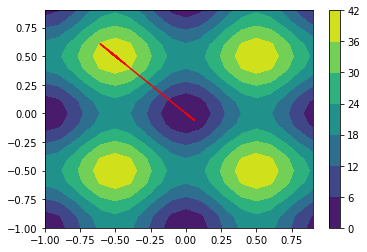

In [457]:
vals = np.arange(-1,1,0.1)
z_c = np.ones(len(vals)**2).reshape(len(vals),len(vals))
for i in range(0,len(vals)):
    for j in range(0,len(vals)):
        x_test = [(x1,vals[i]),(x2,vals[j])]
        z_c[i,j] = float(f.subs(x_test).evalf())
plt.contourf(vals,vals,z_c)
plt.plot(x[:,0],x[:,1],c='red')
plt.colorbar();

### 5 Dimensiones

In [460]:
x1, x2, x3, x4, x5= symbols('x1 x2 x3 x4 x5') #variables simbolicas
x = np.array([[-0.5,0.5,0.5,0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 200 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
error = 10**-60 #Error minimo, criterio de parada

d = 5

f=10*d+((x1**2-10*cos(2*pi*x1))+(x2**2-10*cos(2*pi*x2))+(x3**2-10*cos(2*pi*x3))+(x4**2-10*cos(2*pi*x4))+(x5**2-10*cos(2*pi*x5))) #función objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
df_dx3=diff(f,x3)
df_dx4=diff(f,x4)
df_dx5=diff(f,x5)

d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx32=diff(df_dx3,x3)
d2f_dx42=diff(df_dx4,x4)
d2f_dx52=diff(df_dx5,x5)

d2f_dx1dx2=diff(df_dx1,x2)
d2f_dx1dx3=diff(df_dx1,x3)
d2f_dx1dx4=diff(df_dx1,x4)
d2f_dx1dx5=diff(df_dx1,x5)
d2f_dx2dx3=diff(df_dx2,x3)
d2f_dx2dx4=diff(df_dx2,x4)
d2f_dx2dx5=diff(df_dx2,x5)
d2f_dx3dx4=diff(df_dx3,x4)
d2f_dx3dx5=diff(df_dx3,x5)
d2f_dx4dx5=diff(df_dx4,x5)

x_temp = [(x1,x[0,0]),
          (x2,x[0,1]),
          (x3,x[0,2]),
          (x4,x[0,3]),
          (x5,x[0,4])]
grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf()])#Vector gradiente
H = np.array([
    [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf()],
    [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf()],
    [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf()],
    [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf()],
    [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
ide = np.identity(d) #matriz de identidad
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    x_temp = [(x1,x[i,0]),
              (x2,x[i,1]),
              (x3,x[i,2]),
              (x4,x[i,3]),
              (x5,x[i,4])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([
        [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf()],
        [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf()],
        [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf()],
        [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf()],
        [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf()]])#Hessiano
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 101
final Z value: 2.68052109354750e-36
last x values: [5.21146399753934e-20 -5.21146399753934e-20 -5.21146399753934e-20
 -5.21146399753934e-20 -5.21146399753934e-20]


### 10 Dimensiones

In [461]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10= symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10') #variables simbolicas
x = np.array([[-0.5,0.5,0.5,0.5,0.5,-0.5,0.5,0.5,0.5,0.5]])#Vector de pasos con el punto inicial
lamb = 1000 #Valor lambda para el meta-hessiano
z = np.array([]) #Vector de resultados
error = 10**-60 #Error minimo, criterio de parada

d = 10

f=f=10*d+((x1**2-10*cos(2*pi*x1))+(x2**2-10*cos(2*pi*x2))+(x3**2-10*cos(2*pi*x3))+(x4**2-10*cos(2*pi*x4))+(x5**2-10*cos(2*pi*x5))+(x6**2-10*cos(2*pi*x6))+(x7**2-10*cos(2*pi*x7))+(x8**2-10*cos(2*pi*x8))+(x9**2-10*cos(2*pi*x9))+(x10**2-10*cos(2*pi*x10))) #function objetivo
#Derivadas
df_dx1=diff(f,x1)
df_dx2=diff(f,x2)
df_dx3=diff(f,x3)
df_dx4=diff(f,x4)
df_dx5=diff(f,x5)
df_dx6=diff(f,x6)
df_dx7=diff(f,x7)
df_dx8=diff(f,x8)
df_dx9=diff(f,x9)
df_dx10=diff(f,x10)

d2f_dx12=diff(df_dx1,x1)
d2f_dx22=diff(df_dx2,x2)
d2f_dx32=diff(df_dx3,x3)
d2f_dx42=diff(df_dx4,x4)
d2f_dx52=diff(df_dx5,x5)
d2f_dx62=diff(df_dx6,x6)
d2f_dx72=diff(df_dx7,x7)
d2f_dx82=diff(df_dx8,x8)
d2f_dx92=diff(df_dx9,x9)
d2f_dx102=diff(df_dx10,x10)

d2f_dx1dx2=diff(df_dx1,x2)
d2f_dx1dx3=diff(df_dx1,x3)
d2f_dx1dx4=diff(df_dx1,x4)
d2f_dx1dx5=diff(df_dx1,x5)
d2f_dx1dx6=diff(df_dx1,x6)
d2f_dx1dx7=diff(df_dx1,x7)
d2f_dx1dx8=diff(df_dx1,x8)
d2f_dx1dx9=diff(df_dx1,x9)
d2f_dx1dx10=diff(df_dx1,x10)
d2f_dx2dx3=diff(df_dx2,x3)
d2f_dx2dx4=diff(df_dx2,x4)
d2f_dx2dx5=diff(df_dx2,x5)
d2f_dx2dx6=diff(df_dx2,x6)
d2f_dx2dx7=diff(df_dx2,x7)
d2f_dx2dx8=diff(df_dx2,x8)
d2f_dx2dx9=diff(df_dx2,x9)
d2f_dx2dx10=diff(df_dx2,x10)
d2f_dx3dx4=diff(df_dx3,x4)
d2f_dx3dx5=diff(df_dx3,x5)
d2f_dx3dx6=diff(df_dx3,x6)
d2f_dx3dx7=diff(df_dx3,x7)
d2f_dx3dx8=diff(df_dx3,x8)
d2f_dx3dx9=diff(df_dx3,x9)
d2f_dx3dx10=diff(df_dx3,x10)
d2f_dx4dx5=diff(df_dx4,x5)
d2f_dx4dx6=diff(df_dx4,x6)
d2f_dx4dx7=diff(df_dx4,x7)
d2f_dx4dx8=diff(df_dx4,x8)
d2f_dx4dx9=diff(df_dx4,x9)
d2f_dx4dx10=diff(df_dx4,x10)
d2f_dx5dx6=diff(df_dx5,x6)
d2f_dx5dx7=diff(df_dx5,x7)
d2f_dx5dx8=diff(df_dx5,x8)
d2f_dx5dx9=diff(df_dx5,x9)
d2f_dx5dx10=diff(df_dx5,x10)
d2f_dx6dx7=diff(df_dx6,x7)
d2f_dx6dx8=diff(df_dx6,x8)
d2f_dx6dx9=diff(df_dx6,x9)
d2f_dx6dx10=diff(df_dx6,x10)
d2f_dx7dx8=diff(df_dx7,x8)
d2f_dx7dx9=diff(df_dx7,x9)
d2f_dx7dx10=diff(df_dx7,x10)
d2f_dx8dx9=diff(df_dx8,x9)
d2f_dx8dx10=diff(df_dx8,x10)
d2f_dx9dx10=diff(df_dx9,x10)

x_temp = [(x1,x[0,0]),
          (x2,x[0,1]),
          (x3,x[0,2]),
          (x4,x[0,3]),
          (x5,x[0,4]),
          (x6,x[0,5]),
          (x7,x[0,6]),
          (x8,x[0,7]),
          (x9,x[0,8]),
          (x10,x[0,9])]
grad = np.array([df_dx1.subs(x_temp).evalf(),
                 df_dx2.subs(x_temp).evalf(),
                 df_dx3.subs(x_temp).evalf(),
                 df_dx4.subs(x_temp).evalf(),
                 df_dx5.subs(x_temp).evalf(),
                 df_dx6.subs(x_temp).evalf(),
                 df_dx7.subs(x_temp).evalf(),
                 df_dx8.subs(x_temp).evalf(),
                 df_dx9.subs(x_temp).evalf(),
                 df_dx10.subs(x_temp).evalf()])#Vector gradiente
H = np.array([
    [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf(),
    d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx1dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),
    d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),
    d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),
    d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf(),
    d2f_dx5dx6.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx5dx6.subs(x_temp).evalf(),
    d2f_dx62.subs(x_temp).evalf(),d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx6dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),
    d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx72.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf()],

    [d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),
    d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx82.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),
    d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx92.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf()],
    
    [d2f_dx1dx10.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf(),
    d2f_dx6dx10.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf(),d2f_dx102.subs(x_temp).evalf()]])#Hessiano
last_z = f.subs(x_temp)#evaluar Z con el punto inicial
z = np.append(z,[last_z.evalf()]) # Evaluación del punto inicial
ide = np.identity(d) #matriz de identidad
i = 0
while i <= 100:
    h_new = npl.inv(((lamb*ide)+H.astype(float))) #Inverso del Hessiano Aproximado.
    new_x = (x[i].T-np.matmul(h_new,grad.T)).T #Siguiente paso
    x = np.append(x,new_x).reshape((i+2),d) #Agregar el paso al vector de pasos
    i += 1 #Aumentar el contador de iteraciones
    
    x_temp = [(x1,x[0,0]),
              (x2,x[0,1]),
              (x3,x[0,2]),
              (x4,x[0,3]),
              (x5,x[0,4]),
              (x6,x[0,5]),
              (x7,x[0,6]),
              (x8,x[0,7]),
              (x9,x[0,8]),
              (x10,x[0,9])]
    grad = np.array([df_dx1.subs(x_temp).evalf(),
                     df_dx2.subs(x_temp).evalf(),
                     df_dx3.subs(x_temp).evalf(),
                     df_dx4.subs(x_temp).evalf(),
                     df_dx5.subs(x_temp).evalf(),
                     df_dx6.subs(x_temp).evalf(),
                     df_dx7.subs(x_temp).evalf(),
                     df_dx8.subs(x_temp).evalf(),
                     df_dx9.subs(x_temp).evalf(),
                     df_dx10.subs(x_temp).evalf()])#Vector gradiente
    H = np.array([ #Hessiano
        [d2f_dx12.subs(x_temp).evalf(),d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx1dx5.subs(x_temp).evalf(),
        d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx1dx10.subs(x_temp).evalf()],

        [d2f_dx1dx2.subs(x_temp).evalf(),d2f_dx22.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),
        d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf()],

        [d2f_dx1dx3.subs(x_temp).evalf(),d2f_dx2dx3.subs(x_temp).evalf(),d2f_dx32.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),
        d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf()],

        [d2f_dx1dx4.subs(x_temp).evalf(),d2f_dx2dx4.subs(x_temp).evalf(),d2f_dx3dx4.subs(x_temp).evalf(),d2f_dx42.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),
        d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf()],

        [d2f_dx1dx5.subs(x_temp).evalf(),d2f_dx2dx5.subs(x_temp).evalf(),d2f_dx3dx5.subs(x_temp).evalf(),d2f_dx4dx5.subs(x_temp).evalf(),d2f_dx52.subs(x_temp).evalf(),
        d2f_dx5dx6.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf()],

        [d2f_dx1dx6.subs(x_temp).evalf(),d2f_dx2dx6.subs(x_temp).evalf(),d2f_dx3dx6.subs(x_temp).evalf(),d2f_dx4dx6.subs(x_temp).evalf(),d2f_dx5dx6.subs(x_temp).evalf(),
        d2f_dx62.subs(x_temp).evalf(),d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx6dx10.subs(x_temp).evalf()],

        [d2f_dx1dx7.subs(x_temp).evalf(),d2f_dx2dx7.subs(x_temp).evalf(),d2f_dx3dx7.subs(x_temp).evalf(),d2f_dx4dx7.subs(x_temp).evalf(),d2f_dx5dx7.subs(x_temp).evalf(),
        d2f_dx6dx7.subs(x_temp).evalf(),d2f_dx72.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf()],

        [d2f_dx1dx8.subs(x_temp).evalf(),d2f_dx2dx8.subs(x_temp).evalf(),d2f_dx3dx8.subs(x_temp).evalf(),d2f_dx4dx8.subs(x_temp).evalf(),d2f_dx5dx8.subs(x_temp).evalf(),
        d2f_dx6dx8.subs(x_temp).evalf(),d2f_dx7dx8.subs(x_temp).evalf(),d2f_dx82.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf()],

        [d2f_dx1dx9.subs(x_temp).evalf(),d2f_dx2dx9.subs(x_temp).evalf(),d2f_dx3dx9.subs(x_temp).evalf(),d2f_dx4dx9.subs(x_temp).evalf(),d2f_dx5dx9.subs(x_temp).evalf(),
        d2f_dx6dx9.subs(x_temp).evalf(),d2f_dx7dx9.subs(x_temp).evalf(),d2f_dx8dx9.subs(x_temp).evalf(),d2f_dx92.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf()],

        [d2f_dx1dx10.subs(x_temp).evalf(),d2f_dx2dx10.subs(x_temp).evalf(),d2f_dx3dx10.subs(x_temp).evalf(),d2f_dx4dx10.subs(x_temp).evalf(),d2f_dx5dx10.subs(x_temp).evalf(),
        d2f_dx6dx10.subs(x_temp).evalf(),d2f_dx7dx10.subs(x_temp).evalf(),d2f_dx8dx10.subs(x_temp).evalf(),d2f_dx9dx10.subs(x_temp).evalf(),d2f_dx102.subs(x_temp).evalf()]])
        
    actual_z = f.subs(x_temp)
    z = np.append(z,[actual_z.evalf()]) # Evaluación del punto actual
    if Abs(actual_z-last_z).evalf()<=error:
        break
    else:
        last_z = actual_z
print("last iterarion: " + str(i))
print("final Z value: " + str(actual_z.evalf()))
print("last x values: "+ str(new_x))

last iterarion: 1
final Z value: 202.500000000000
last x values: [-0.498353139097258 0.498353139097258 0.498353139097258 0.498353139097258
 0.498353139097258 -0.498353139097258 0.498353139097258 0.498353139097258
 0.498353139097258 0.498353139097258]


## Función de Levy

## Función de Griewank

## Función de Rosenbrock Extendida